In [1]:
import sys
import os
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
sys.path.append("../gotmtool")
from gotmtool import *

In [2]:
dataroot = '../Forcing_entire_cruise2'
filename1 = '1D_SD_ERA5_input_2.mat'
filename2 = 'puturbation_data.mat'

In [3]:
dat_org = sio.loadmat(os.path.join(dataroot, filename1))
dat_ptb = sio.loadmat(os.path.join(dataroot, filename2))

In [4]:
dat_org

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Sat Sep 11 03:25:43 2021',
 '__version__': '1.0',
 '__globals__': [],
 'ERA5_met': array([[(array([[31.02118056],
                [31.06284722],
                [31.10451389],
                ...,
                [84.43784722],
                [84.47951389],
                [84.52118056]]), array([[-14.23833345],
                [-12.06615976],
                [ -7.48580267],
                ...,
                [  8.97573651],
                [  9.42343643],
                [  9.20787721]]), array([[-11.72048145],
                [ -9.84770285],
                [ -5.95017074],
                ...,
                [ -4.87515277],
                [ -5.03014134],
                [ -5.05597277]]), array([[-90.87928855],
                [-94.10734639],
                [-95.45779486],
                ...,
                [-51.92340535],
                [-64.75593158],
                [-85.57889728]]), array([[1056.83626951]

In [5]:
dat_ptb

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Tue Aug 31 17:19:50 2021',
 '__version__': '1.0',
 '__globals__': [],
 'diff_sf_lhf_16km': array([[ 0.47263835],
        [ 0.06871145],
        [ 0.05358397],
        ...,
        [ 0.77556273],
        [ 0.88454102],
        [-2.60155295]]),
 'diff_sf_shf_16km': array([[ 0.35784759],
        [ 0.03897248],
        [ 0.09014996],
        ...,
        [ 0.90142606],
        [ 0.97987117],
        [-2.59263823]]),
 'diff_sf_slp_16km': array([[0.14039021],
        [0.15527455],
        [0.16764372],
        ...,
        [0.02062809],
        [0.02558687],
        [0.05895812]]),
 'diff_sf_sst_16km': array([[ 0.01741634],
        [-0.00770419],
        [ 0.01718032],
        ...,
        [ 0.01361647],
        [-0.00493304],
        [-0.00900656]]),
 'diff_sf_tair_16km': array([[ 0.00993372],
        [ 0.00377633],
        [-0.00467843],
        ...,
        [-0.04717146],
        [-0.0503818 ],
        [-0.05468698]]),
 '

In [6]:
era5_met = dat_org['ERA5_met'][0,0]
sd_met = dat_org['SD_met'][0,0]
keys = [v[0] for v in era5_met.dtype.descr]
print(keys)

['time', 'qlat', 'qsens', 'lw', 'sw', 'precip', 'tau', 'U', 'Udir']


In [7]:
year = 2019
doy = era5_met['time']
dttime_flt = [(pd.to_datetime(year*1000 + np.floor(d), format='%Y%j') 
             + pd.to_timedelta((d-np.floor(d))*86400, unit='S'))[0] for d in doy]
dttime_flt

[Timestamp('2019-01-31 00:30:29.999999888'),
 Timestamp('2019-01-31 01:30:30.000000056'),
 Timestamp('2019-01-31 02:30:30.000000056'),
 Timestamp('2019-01-31 03:30:29.999999888'),
 Timestamp('2019-01-31 04:30:30.000000056'),
 Timestamp('2019-01-31 05:30:30.000000056'),
 Timestamp('2019-01-31 06:30:29.999999888'),
 Timestamp('2019-01-31 07:30:30.000000056'),
 Timestamp('2019-01-31 08:30:30.000000056'),
 Timestamp('2019-01-31 09:30:29.999999888'),
 Timestamp('2019-01-31 10:30:30.000000056'),
 Timestamp('2019-01-31 11:30:30.000000056'),
 Timestamp('2019-01-31 12:30:29.999999888'),
 Timestamp('2019-01-31 13:30:30.000000056'),
 Timestamp('2019-01-31 14:30:30.000000056'),
 Timestamp('2019-01-31 15:30:29.999999888'),
 Timestamp('2019-01-31 16:30:30.000000056'),
 Timestamp('2019-01-31 17:30:30.000000056'),
 Timestamp('2019-01-31 18:30:29.999999888'),
 Timestamp('2019-01-31 19:30:30.000000056'),
 Timestamp('2019-01-31 20:30:30.000000056'),
 Timestamp('2019-01-31 21:30:29.999999888'),
 Timestamp

In [8]:
year = 2019
doy = dat_ptb['diff_sf_time']
dttime_ptb = [(pd.to_datetime(year*1000 + np.floor(d), format='%Y%j') 
             + pd.to_timedelta((d-np.floor(d))*86400, unit='S'))[0] for d in doy]
dttime_ptb

[Timestamp('2019-01-31 00:30:59.999999776'),
 Timestamp('2019-01-31 00:31:59.999996200'),
 Timestamp('2019-01-31 00:33:00.000002682'),
 Timestamp('2019-01-31 00:33:59.999999106'),
 Timestamp('2019-01-31 00:34:59.999995530'),
 Timestamp('2019-01-31 00:36:00.000002012'),
 Timestamp('2019-01-31 00:36:59.999998435'),
 Timestamp('2019-01-31 00:38:00.000004917'),
 Timestamp('2019-01-31 00:39:00.000001341'),
 Timestamp('2019-01-31 00:39:59.999997765'),
 Timestamp('2019-01-31 00:41:00.000004247'),
 Timestamp('2019-01-31 00:42:00.000000671'),
 Timestamp('2019-01-31 00:42:59.999997094'),
 Timestamp('2019-01-31 00:44:00.000003576'),
 Timestamp('2019-01-31 00:45:00'),
 Timestamp('2019-01-31 00:45:59.999996424'),
 Timestamp('2019-01-31 00:47:00.000002906'),
 Timestamp('2019-01-31 00:47:59.999999329'),
 Timestamp('2019-01-31 00:48:59.999995753'),
 Timestamp('2019-01-31 00:50:00.000002235'),
 Timestamp('2019-01-31 00:50:59.999998659'),
 Timestamp('2019-01-31 00:51:59.999995083'),
 Timestamp('2019-01-

(40.0, 41.0)

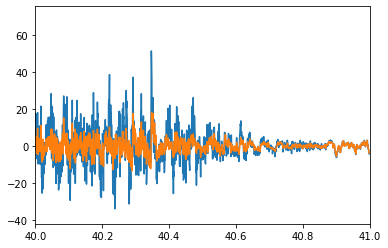

In [9]:
plt.plot(dat_ptb['diff_sf_time'], dat_ptb['diff_sf_lhf_16km'])
plt.plot(dat_ptb['diff_sf_time'], dat_ptb['diff_sf_shf_16km'])
plt.xlim([40, 41])

In [11]:
idx_p = {}
idx_s = {}
for t in [40, 40.5, 41]:
    i = np.argmin(np.abs(dat_ptb['diff_sf_time']-t))
    idx_p[str(t)] = i
    print('idx = {}, time = {}'.format(i, dat_ptb['diff_sf_time'][i]))
    j = np.argmin(np.abs(sd_met['time']-t))
    idx_s[str(t)] = j
    print('idx = {}, time = {}'.format(j, sd_met['time'][j]))

print(idx_p)
print(idx_s)

idx = 12929, time = [40.]
idx = 215, time = [39.97951389]
idx = 13649, time = [40.5]
idx = 227, time = [40.47951389]
idx = 14369, time = [41.]
idx = 239, time = [40.97951389]
{'40': 12929, '40.5': 13649, '41': 14369}
{'40': 215, '40.5': 227, '41': 239}


In [27]:
dat = dat_ptb['diff_sf_shf_16km'][idx_p['40']:idx_p['41']] + dat_ptb['diff_sf_lhf_16km'][idx_p['40']:idx_p['41']]
vmax = dat.max()
vmin = dat.min()
print('vmax = {}, vmin = {}'.format(vmax, vmin))
imax = dat.argmax()
imin = dat.argmin()
print('imax = {}, imin = {}'.format(imax, imin))
time = dat_ptb['diff_sf_time'][idx_p['40']:idx_p['41']]
print('tmax = {}, tmin = {}'.format(time[imax], time[imin]))

vmax = 64.28758315329466, vmin = -41.56982152985874
imax = 500, imin = 150
tmax = [40.34722222], tmin = [40.10416667]


Text(0, 0.5, '$\\Delta $SHF + $\\Delta$LHF (W m$^{-2}$)')

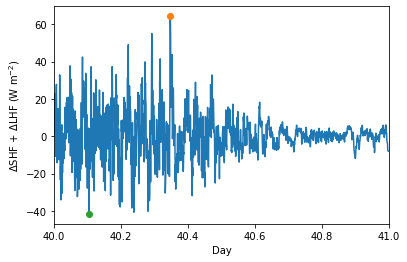

In [29]:
# dat = dat_ptb['diff_sf_lhf_16km']+dat_ptb['diff_sf_shf_16km']
plt.plot(time, dat)
plt.xlim([40, 41])
plt.plot(time[imax], dat[imax], 'o')
plt.plot(time[imin], dat[imin], 'o')
plt.xlabel('Day')
plt.ylabel('$\Delta $SHF + $\Delta$LHF (W m$^{-2}$)')

tau_max = [0.20222648], tau_min = [0.23210275]
tau_mean = 0.2446117097353441


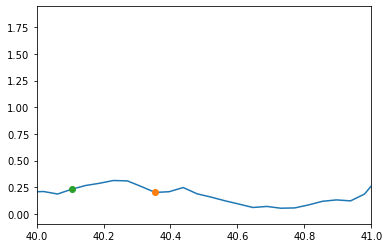

In [20]:
plt.plot(sd_met['time'], sd_met['tau'])
plt.xlim([40,41])
jmax = np.argmin(np.abs(sd_met['time']-time[imax]))
jmin = np.argmin(np.abs(sd_met['time']-time[imin]))
dat = sd_met['tau']
print('tau_max = {}, tau_min = {}'.format(dat[jmax], dat[jmin]))
plt.plot(sd_met['time'][jmax], dat[jmax], 'o')
plt.plot(sd_met['time'][jmin], dat[jmin], 'o')
print('tau_mean = {}'.format(dat[idx_s['40']:idx_s['40.5']].mean()))

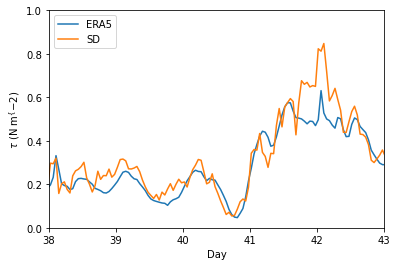

In [34]:
plt.plot(era5_met['time'], era5_met['tau'], label='ERA5')
plt.plot(sd_met['time'], sd_met['tau'], label='SD')
plt.xlim([38,43])
plt.ylim([0, 1])
plt.xlabel('Day')
plt.ylabel('$\\tau$ (N m$^\{-2}$)')
plt.legend()

hf_max = [162.52767853], hf_min = [214.31603058]
hf_mean = 196.29065416304465


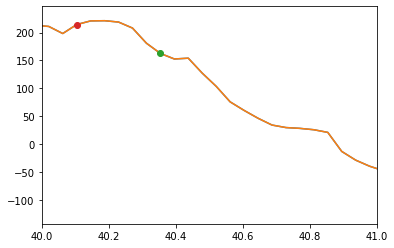

In [21]:
plt.plot(sd_met['time'], sd_met['qlat']+sd_met['qsens'])
plt.plot(sd_met['time'], sd_met['qlat']+sd_met['qsens'])
plt.xlim([40,41])
dat = sd_met['qlat']+sd_met['qsens']
print('hf_max = {}, hf_min = {}'.format(dat[jmax], dat[jmin]))
plt.plot(sd_met['time'][jmax], dat[jmax], 'o')
plt.plot(sd_met['time'][jmin], dat[jmin], 'o')
print('hf_mean = {}'.format(dat[idx_s['40']:idx_s['40.5']].mean()))

lw_max = [-67.45262187], lw_min = [-60.22602325]
lw_mean = -61.59941462870796


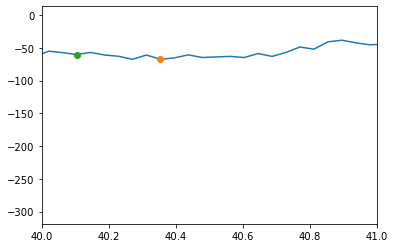

In [22]:
plt.plot(era5_met['time'], era5_met['lw'])
plt.xlim([40,41])
dat = era5_met['lw']
print('lw_max = {}, lw_min = {}'.format(dat[jmax], dat[jmin]))
plt.plot(sd_met['time'][jmax], dat[jmax], 'o')
plt.plot(sd_met['time'][jmin], dat[jmin], 'o')
print('lw_mean = {}'.format(dat[idx_s['40']:idx_s['40.5']].mean()))

Text(0, 0.5, 'SW (W m$^{-2}$)')

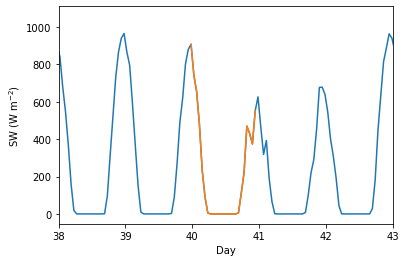

In [25]:
plt.plot(era5_met['time'], era5_met['sw'])
plt.plot(era5_met['time'][idx_s['40']:idx_s['41']], era5_met['sw'][idx_s['40']:idx_s['41']])
plt.xlim([38,43])
era5_met['sw'][idx_s['40']:idx_s['41']].mean()
plt.xlabel('Day')
plt.ylabel('SW (W m$^{-2}$)')

In [ ]:
plt.plot(era5_met['time'], era5_met['qlat'])
plt.plot(era5_met['time'], era5_met['qsens'])
plt.plot(era5_met['time'], era5_met['lw'])
plt.plot(era5_met['time'], era5_met['sw'])

In [ ]:
plt.plot(sd_met['time'], sd_met['qlat'], '-k')
plt.plot(sd_met['time'], sd_met['qsens'], '-r')
plt.plot(sd_met['time'], sd_met['qlat'], '--k')
plt.plot(sd_met['time'], sd_met['qsens'], '--r')

In [ ]:
# sw = era5_met['sw'].squeeze()
# dat_dump_ts(dttime, [sw], 'swr.dat', skip_value=np.nan)